<a href="https://colab.research.google.com/github/aniroh/internship-Project/blob/master/InternshipProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title:Exploratory Data Analysis of Car Features** 

#Introduction
#What is Exploratory Data Analysis ?

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important.

#Context:

As a data scientist, the majority of your time will be spent on data pre-processing i.e.
making sure you have the right data in the right format. Once this is done, you get a
sense of your dataset through applying some descriptive statistics and then, you move
on to the exploration stage wherein you plot various graphs and mine the hidden
insights. In this project, you as a data scientist are expected to perform Exploratory data
analysis on how the different features of a car and its price are related. The data comes
from the Kaggle dataset "Car Features and MSRP". It describes almost 12,000 car
models, sold in the USA between 1990 and 2017, with the market price (new or used)
and some features.

#Objective:
The objective of the project is to do data pre-processing and exploratory data analysis
of the dataset.

#So let's get started!


#1. Importing the required libraries for EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


upload csv files

In [3]:
#uploading data.csv from your pc
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


#1.1 Loading the data into the data frame.

In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [5]:
# To display the top 5 rows 
df.head(5) 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
 # To display the botton 5 rows
df.tail(5)  

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


#1.2 Checking the types of data and basic summary stats.

In [7]:
#Checking the datatypes of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [8]:
#Description of columns in our data
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


#2. Dropping irrelevant columns.

This step is certainly needed in EDA because sometimes there would be columns that we never use and in such cases dropping is useful. In this case, the columns such as Engine Fuel Type, Number of doors, Market Category and Popularity may not be relevant.Also numerical data might be important to measure the correlation between price and the data, so its not ideal to drop them.

In [6]:
df = df.drop(['Engine Fuel Type', 'Number of Doors','Market Category','Popularity'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,34500


#3. Renaming the columns
It's a good practice to rename column names as it improves the readability of the data set.

In [12]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,34500


#4.Dropping the duplicate rows.
This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data, so here we remove all the duplicate value from the data-set. It helps in reducing our required computational power and makes our data clean.

In [14]:
#number of rows before removing duplicate rows
df.shape

(11914, 12)

In [7]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (792, 12)


In [8]:
#dropping the duplicate rows
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,34500


In [17]:
# number of rows after removing duplicate rows
df.shape

(11122, 12)

792 duplicate rows dropped! Thus we reduced about 6.65% of our data that otherwise we had to compute extra!

#4.1 Dropping the missing or null values.
This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not the best approach and generally people just replace the missing values with the mean or the average of that column. This helps in fine tuning the model performance as more the data, a model has the better it performs. But the objective of this project is to do EDA and its fine to drop missing values and also the number of missing values is small compared to the entire dataset.

In [9]:
#number of null values per column
print(df.isnull().sum())

Make                  0
Model                 0
Year                  0
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
MSRP                  0
dtype: int64


In [10]:
df = df.dropna()    # Dropping the missing values.

In [20]:
#number of null values per column
print(df.isnull().sum())

Make                 0
Model                0
Year                 0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
MSRP                 0
dtype: int64


#5. Detecting Outliers
An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers. To know more about handling outliers, here is a resource[ towards data science](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba).

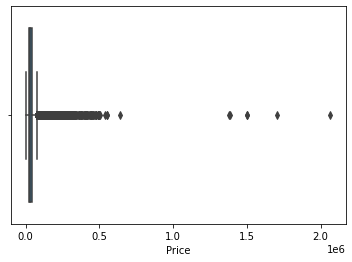

In [13]:
sns.boxplot(x=df['Price'])

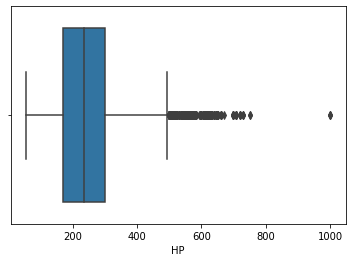

In [14]:
sns.boxplot(x=df['HP'])

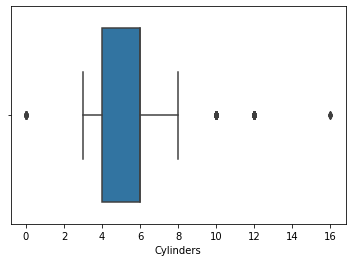

In [15]:
sns.boxplot(x=df['Cylinders'])

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year             9.00
HP             131.00
Cylinders        2.00
MPG-H            8.00
MPG-C            6.00
Price        21426.25
dtype: float64


In [17]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(9307, 12)

#6. What cars are the most represented in the dataset?

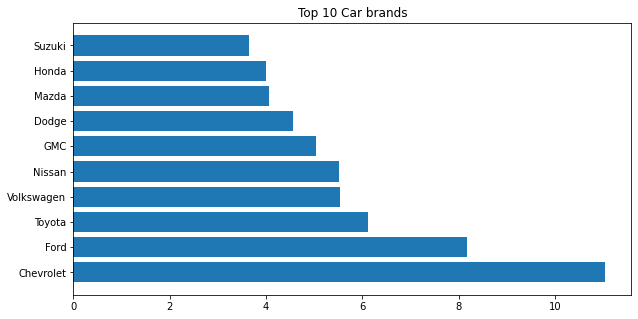

In [19]:
# Percentage of car per brand
perc = df['Make'].value_counts()*100/sum(df['Make'].value_counts())

# Top 10 car brands
top_ten = perc.index[:10]
    
# Plot
plt.figure(figsize=(10,5))
plt.barh(top_ten, width=perc[:10])
plt.title('Top 10 Car brands')
plt.show()

In [20]:
#average price among the top ten brands
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
Ford        28326.220762
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


#7. Correlation matrix


In [21]:
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.338170,-0.124527,0.369743,0.331108,0.606502
HP,0.338170,1.000000,0.713408,-0.443473,-0.543048,0.740669
Cylinders,-0.124527,0.713408,1.000000,-0.703194,-0.754693,0.353675
MPG-H,0.369743,-0.443473,-0.703194,1.000000,0.939192,-0.105358
MPG-C,0.331108,-0.543048,-0.754693,0.939192,1.000000,-0.177728
Price,0.606502,0.740669,0.353675,-0.105358,-0.177728,1.000000


**High correlation between-**

*   HP and Cylinders
*   MPG-H and MPG-C

*   HP and Price

HP and cylinders are correlated because more cylinders=more horsepower.

HP and price are correlated because more energy you use= more price you have to pay.



**High anticorrelation between-**


*   Cylinders and MPG-H
*   Cylinders and MPG-C

Highway mpg / Engine Cylinders have a strong negative correlation with highway and city MPG because lower MPG figures mean higher fuel consumption.









Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. In the below heat map we know that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders.

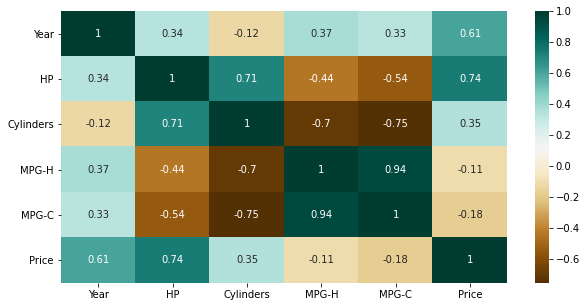

In [22]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

#Scatterplot

A scatterplot is a type of data display that shows the relationship between two numerical variables. Each member of the dataset gets plotted as a point whose x-y coordinates relates to its values for the two variables.

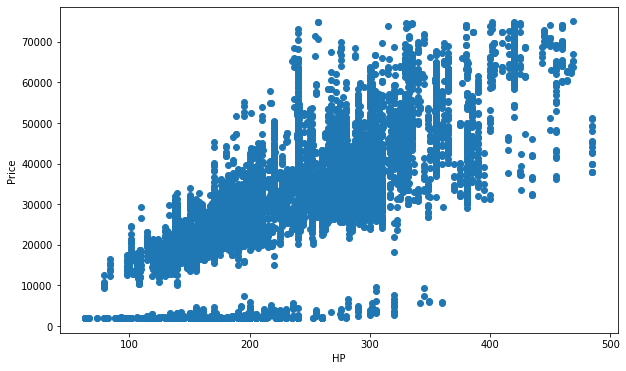

In [23]:
#Scatterplot between HP and price
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

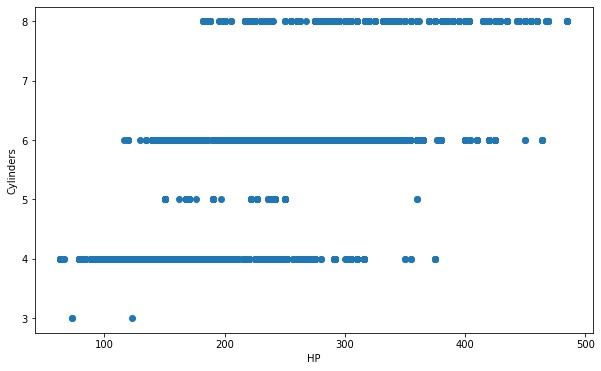

In [24]:
#Scatterplot between HP and cylinders
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Cylinders'])
ax.set_xlabel('HP')
ax.set_ylabel('Cylinders')
plt.show()

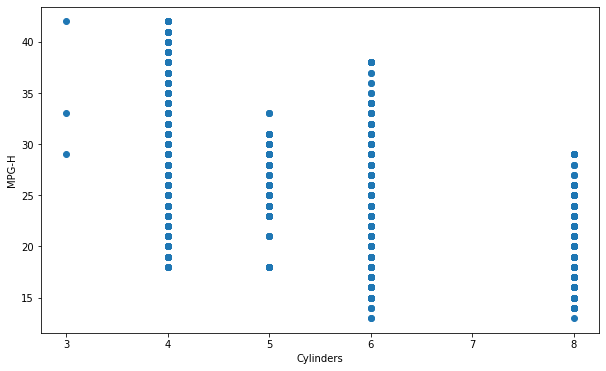

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Cylinders'], df['MPG-H'])
ax.set_xlabel('Cylinders')
ax.set_ylabel('MPG-H')
plt.show()

#Splitting the dataset into 80:20 ratio



In [50]:
from sklearn.model_selection import train_test_split 
X=pd.DataFrame(df['HP'])
Y=pd.DataFrame(df['Price'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8,test_size=0.2, random_state=0)


In [48]:
print(X_train)

420      2256.0
10370    2202.0
1824     2225.0
5626     2212.0
1725     2150.0
          ...  
10231    2295.0
11829    2123.0
6264     2191.0
4306     2338.0
3622     2309.0
Length: 7445, dtype: float64


In [44]:
print(X_test)

7858     416.0
9831     185.0
4921     201.0
5744     270.0
7111     167.0
         ...  
5863     148.0
11402    127.0
9545     285.0
7853     420.0
3558     300.0
Name: HP, Length: 1862, dtype: float64


In [53]:
TRAIN_OUTPUT=list()
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
y_test=model.predict(X_test)
print(y_test)

[[56988.6201526 ]
 [23291.83461385]
 [25625.81110138]
 ...
 [37879.18766093]
 [57572.11427448]
 [40067.29061799]]


array([[145.87353047]])

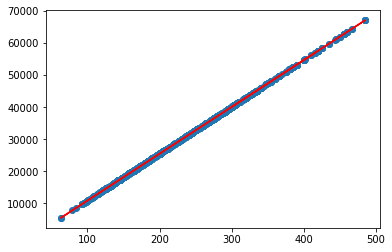

In [54]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test,color='red')
model.intercept_
model.coef_
